In [6]:
from pylab import mpl
import pandas as pd
import talib
mpl.rcParams['font.sans-serif']=['KaiTi']
mpl.rcParams['axes.unicode_minus']=False

In [7]:
stock="sh.600585"

In [8]:
import baostock as bs
import pandas as pd

#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

#### 获取沪深A股历史K线数据 ####
# 详细指标参数，参见“历史行情指标参数”章节；“分钟线”参数与“日线”参数不同。
# 分钟线指标：date,time,code,open,high,low,close,volume,amount,adjustflag
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs = bs.query_history_k_data_plus(stock,
    "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST",
    start_date='2019-01-01', end_date='2020-10-31',
    frequency="d", adjustflag="3")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

#### 打印结果集 ####
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)

#### 结果集输出到csv文件 ####   
result.to_csv(stock+"_k_data.csv", index=False)
print(result)

#### 登出系统 ####
bs.logout()

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
           date       code     open     high      low    close preclose  \
0    2019-01-02  sh.600585  29.3000  29.4000  28.5600  28.8200  29.2800   
1    2019-01-03  sh.600585  28.6900  29.0100  28.0500  28.2300  28.8200   
2    2019-01-04  sh.600585  27.7700  28.5200  27.2300  28.4000  28.2300   
3    2019-01-07  sh.600585  28.7000  29.0300  28.3900  29.0200  28.4000   
4    2019-01-08  sh.600585  28.9100  29.2900  28.6600  29.0500  29.0200   
5    2019-01-09  sh.600585  29.2800  29.8500  29.1500  29.1900  29.0500   
6    2019-01-10  sh.600585  29.1600  29.4900  29.0000  29.3300  29.1900   
7    2019-01-11  sh.600585  29.9200  30.1500  29.2000  29.6700  29.3300   
8    2019-01-14  sh.600585  29.6200  29.8200  29.4100  29.6700  29.6700   
9    2019-01-15  sh.600585  29.6900  30.3800  29.6200  30.3400  29.6700   


logout success!


In [9]:
df = pd.read_csv(stock+"_k_data.csv",header=0,index_col=0)

In [5]:
cci= talib.CCI(df.high, df.low, df.close, 14)
df['cci']=cci
rsi=talib.RSI(df.close,14)
df['rsi']=rsi

NameError: name 'df' is not defined

In [27]:
#df = pd.read_excel("600859_stock_k_data.xlsx",sheet_name="600859_stock_k_data",header=0,index_col=0)

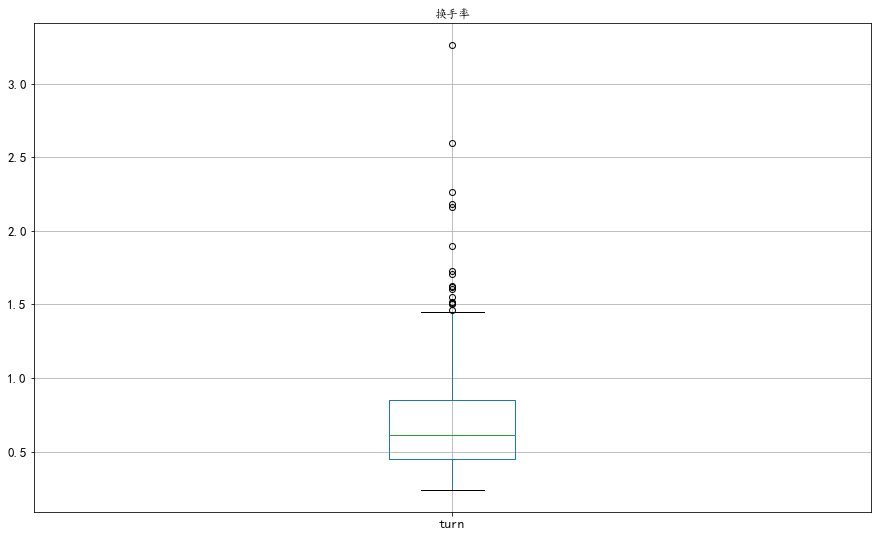

In [28]:
df2=df['turn']
df2.plot(kind="box",figsize=(15,9),title="换手率",grid=True,fontsize=13)

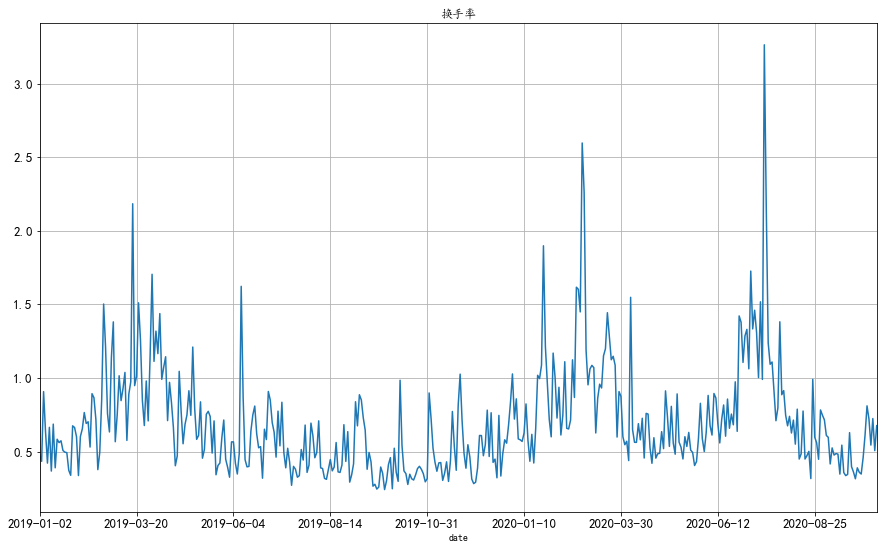

In [29]:
df2.plot(kind="line",figsize=(15,9),title="换手率",grid=True,fontsize=13)

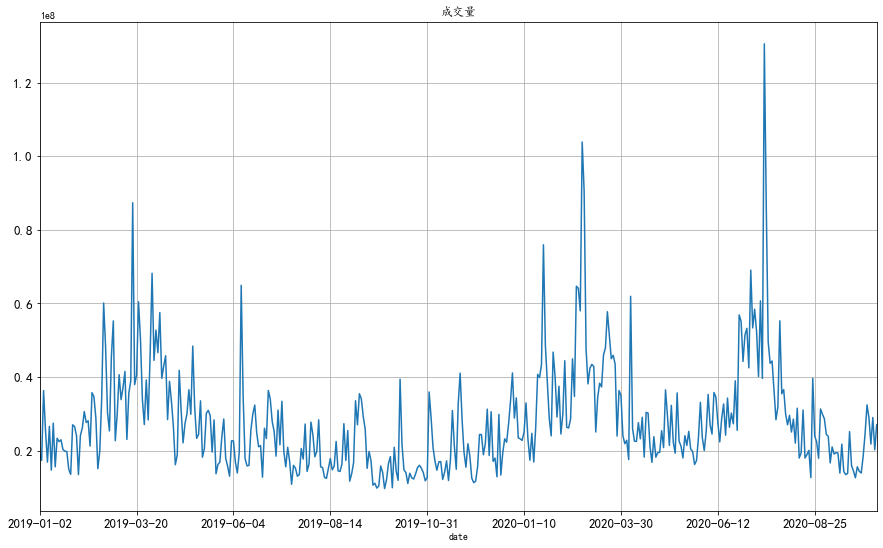

In [30]:
df['volume'].plot(kind="line",figsize=(15,9),title="成交量",grid=True,fontsize=13)

In [31]:
df2.describe()

count    433.000000
mean       0.698720
std        0.362323
min        0.242900
25%        0.448380
50%        0.613000
75%        0.849223
max        3.263600
Name: turn, dtype: float64

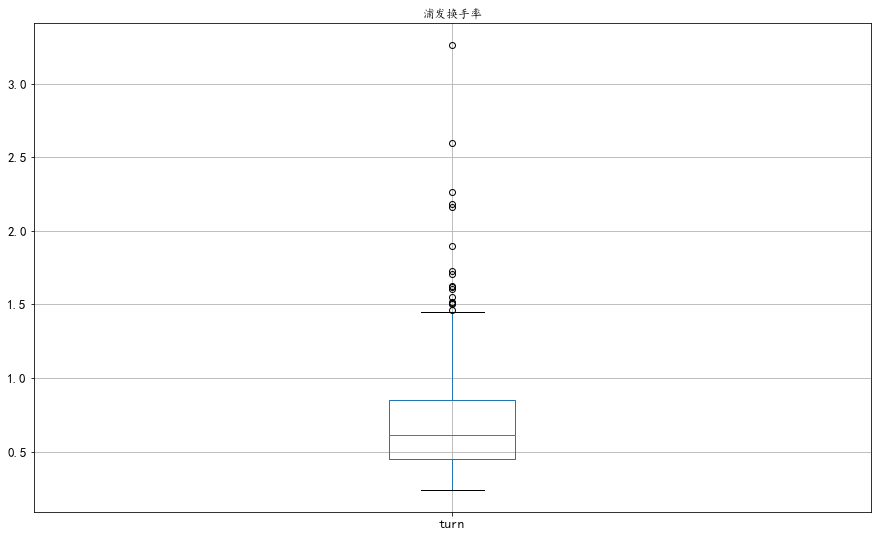

In [32]:
df2.plot(kind="box",figsize=(15,9),title="浦发换手率",grid=True,fontsize=13)

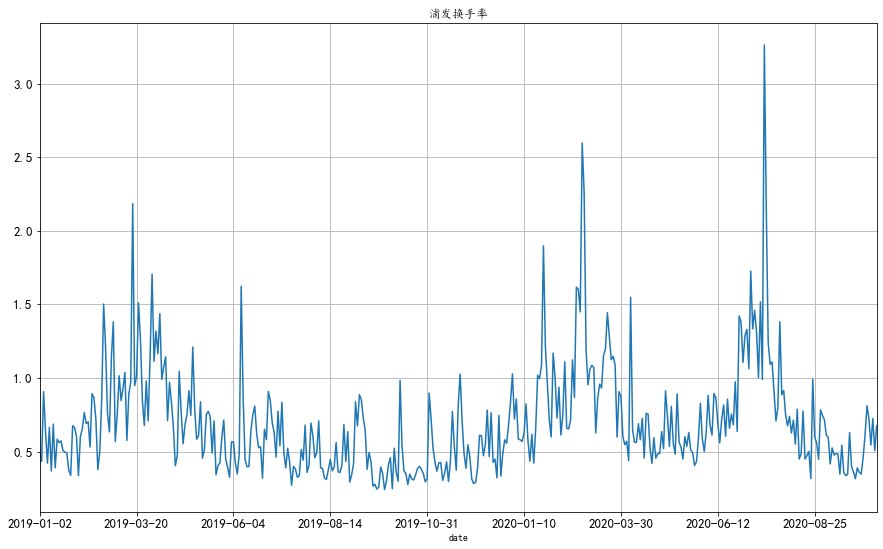

In [33]:
df2.plot(kind="line",figsize=(15,9),title="浦发换手率",grid=True,fontsize=13)

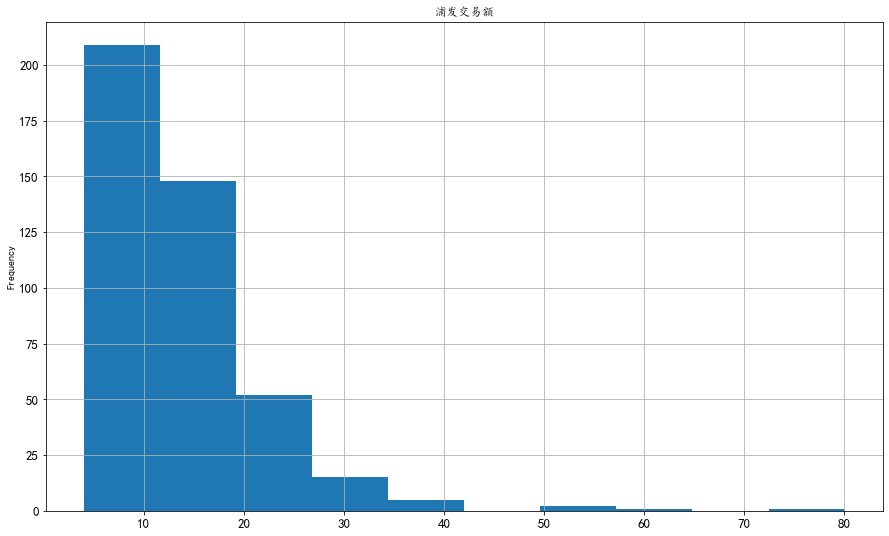

In [34]:
df3=df['amount']/100000000
df3.plot(kind="hist",figsize=(15,9),title="浦发交易额",grid=True,fontsize=13)

In [35]:
df3.describe()

count    433.000000
mean      13.490887
std        8.320089
min        4.019378
25%        7.681770
50%       11.833203
75%       16.640901
max       80.033575
Name: amount, dtype: float64

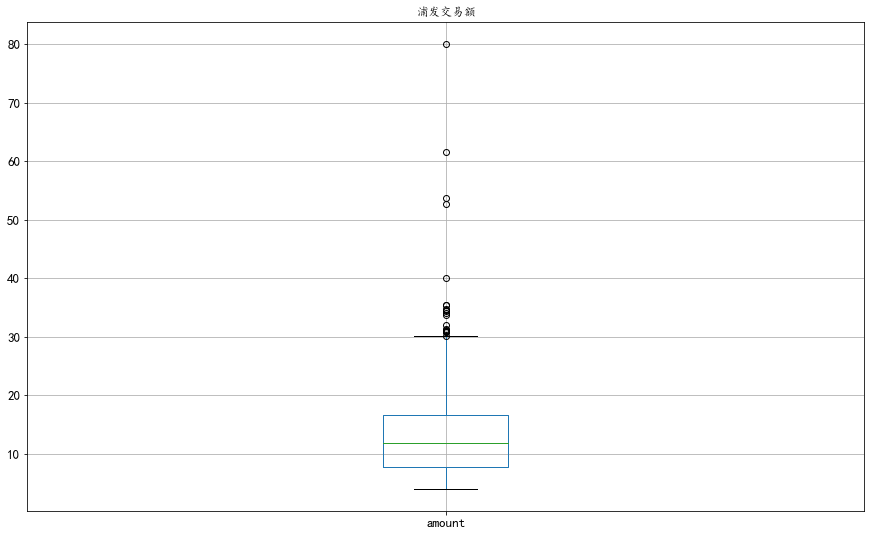

In [36]:
df3.plot(kind="box",figsize=(15,9),title="浦发交易额",grid=True,fontsize=13)

In [37]:
df4=df[['open','high','low','close']]

In [38]:
df4.head()

,open,high,low,close
date,,,,
2019-01-02,29.30,29.40,28.56,28.82
2019-01-03,28.69,29.01,28.05,28.23
2019-01-04,27.77,28.52,27.23,28.40
2019-01-07,28.70,29.03,28.39,29.02
2019-01-08,28.91,29.29,28.66,29.05


D:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
D:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002166C5B2198>,
      dtype=object)

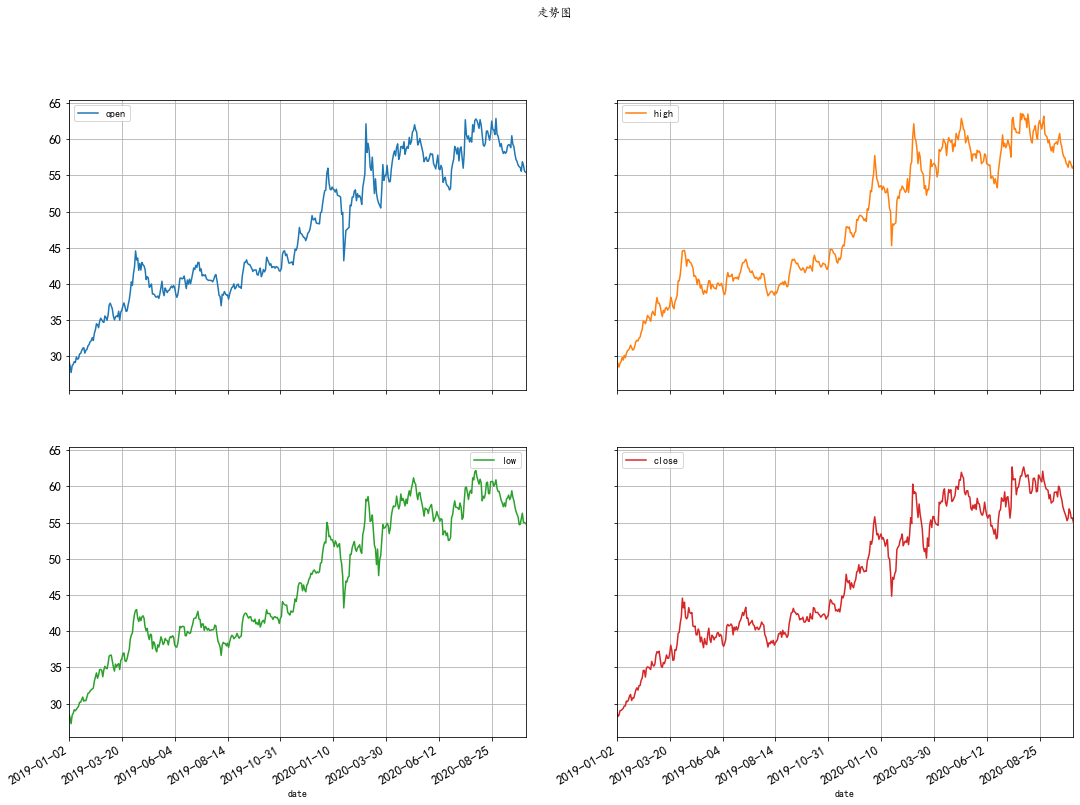

In [39]:
df4.plot(kind="line",subplots=True,sharex=True,sharey=True,layout=(2,2),figsize=(18,13),title="走势图",grid=True,fontsize=13)

In [40]:
df5=df[['open','high','low','close','turn','amount','cci','rsi']]

D:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
D:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002166CB2B780>,
      dtype=object)

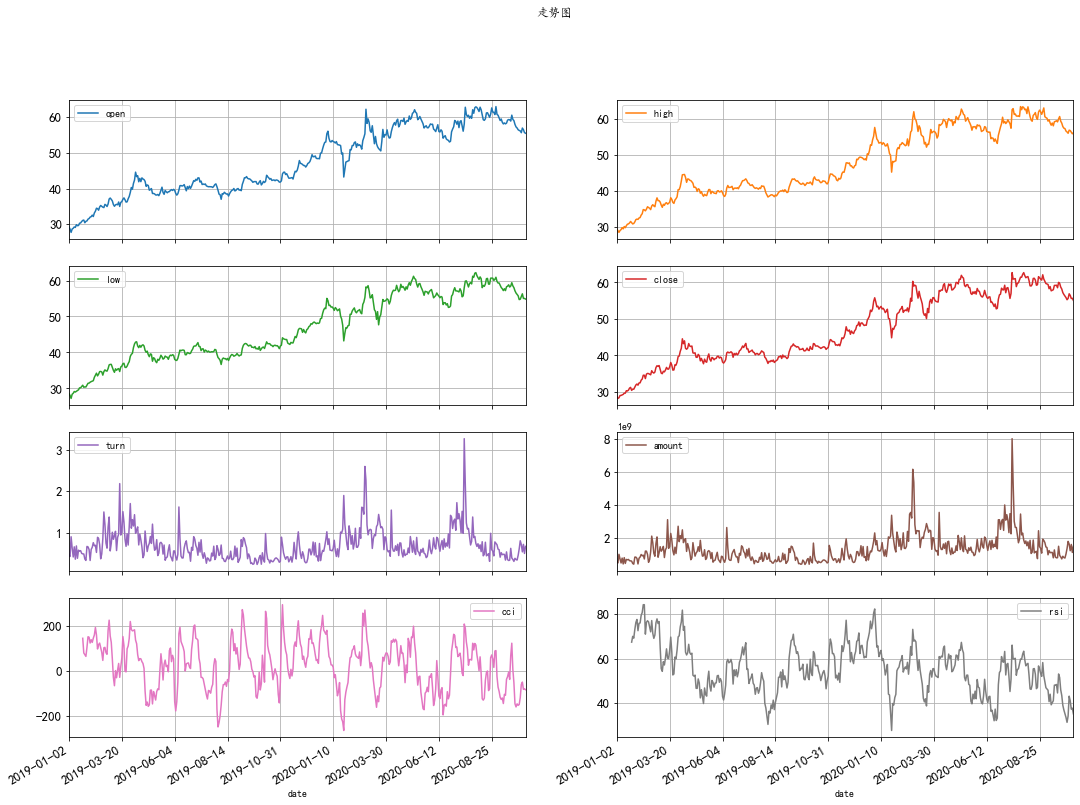

In [41]:
df5.plot(kind="line",subplots=True,sharex=True,layout=(4,2),figsize=(18,13),title="走势图",grid=True,fontsize=13)

In [70]:
df2=df.dropna()

In [75]:
df2[(df2.cci>100) & (df2.rsi>80)]

,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST,cci,rsi
date,,,,,,,,,,,,,,,
2019-02-12,sh.600585,33.18,33.71,33.09,33.53,33.22,27675060,9.253807e+08,3,0.691928,1,0.933165,0,158.687778,80.681479
2019-02-13,sh.600585,33.68,34.87,33.65,34.58,33.53,28125941,9.625174e+08,3,0.703201,1,3.131533,0,192.052491,84.223433
2019-02-14,sh.600585,34.51,34.79,34.24,34.58,34.58,21257797,7.326469e+08,3,0.531484,1,0.000000,0,158.438947,84.223433
2019-04-08,sh.600585,42.36,44.56,42.36,44.56,41.95,57518339,2.493026e+09,3,1.438065,1,6.221694,0,181.947931,81.788931
2019-12-31,sh.600585,52.99,55.32,52.18,54.80,52.77,33500063,1.806152e+09,3,0.837600,1,3.846900,0,162.388562,80.468166
2020-01-02,sh.600585,55.30,57.75,55.03,55.80,54.80,41123567,2.306727e+09,3,1.028200,1,1.824800,0,179.437380,82.313238


In [ ]:
import baostock as bs
import pandas as pd

#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

#### 获取沪深A股历史K线数据 ####
# 详细指标参数，参见“历史行情指标参数”章节；“分钟线”参数与“日线”参数不同。
# 分钟线指标：date,time,code,open,high,low,close,volume,amount,adjustflag
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs = bs.query_history_k_data_plus("sh.600859",
    "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST",
    start_date='2019-06-01', end_date='2020-10-31',
    frequency="d", adjustflag="3")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

#### 打印结果集 ####
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)

#### 结果集输出到csv文件 ####   
result.to_csv("600859_stock_k_data.csv", index=False)
print(result)

#### 登出系统 ####
bs.logout()

In [ ]:
import baostock as bs
import pandas as pd

# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

# 获取上证50成分股
rs = bs.query_sz50_stocks()
print('query_sz50 error_code:'+rs.error_code)
print('query_sz50  error_msg:'+rs.error_msg)

# 打印结果集
sz50_stocks = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    sz50_stocks.append(rs.get_row_data())
result = pd.DataFrame(sz50_stocks, columns=rs.fields)
# 结果集输出到csv文件
result.to_csv("D:/sz50_stocks.csv", encoding="gbk", index=False)
print(result)

# 登出系统
bs.logout()

In [76]:
value=2e6

In [77]:
value

2000000.0